In [276]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import os
import numpy as np
import matplotlib.pyplot as plt
(train_imgs, train_labels),(test_imgs,test_labels)=tf.keras.datasets.mnist.load_data()


In [277]:
print( f"Train img shape {train_imgs.shape}")
print( f"Train label shape {train_labels.shape}")
print( f"Test img shape {test_imgs.shape}")
print( f"Test label shape {test_labels.shape}")

Train img shape (60000, 28, 28)
Train label shape (60000,)
Test img shape (10000, 28, 28)
Test label shape (10000,)


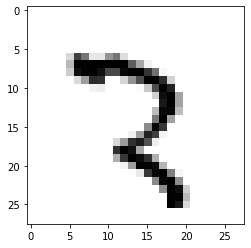

In [278]:
i=500
plt.figure()
plt.imshow(train_imgs[i], cmap=plt.cm.gray_r)
plt.show()

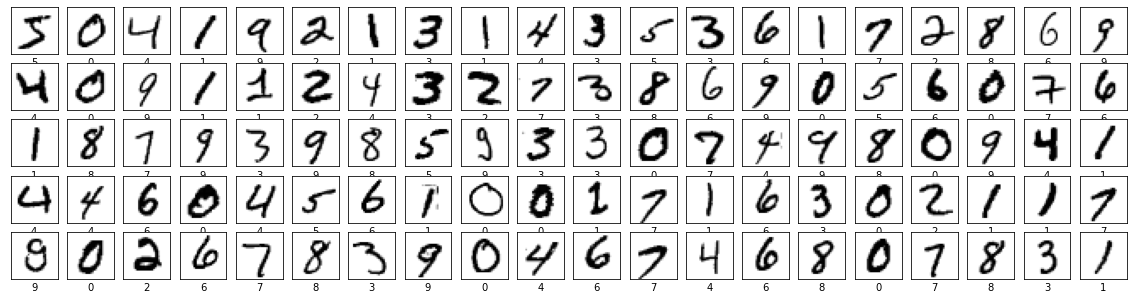

In [279]:
R=5
C=20
i=0
plt.figure(figsize=(20,5))
for r in range (R):
      for c in range(C):
        plt.subplot(R,C,i+1)
        plt.imshow(train_imgs[i], cmap=plt.cm.gray_r)
        plt.xlabel(train_labels[i])
        plt.xticks([])
        plt.yticks([])
        i+=1

In [280]:
train_imgs, test_imgs = train_imgs.reshape(-1,28,28,1), test_imgs.reshape(-1,28,28,1)

In [281]:
model=keras.Sequential([
                                  #input layer
                                  keras.Input(shape=(28,28,1)),
                                  #hidden layer
                                  layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                                  layers.MaxPooling2D(pool_size=(2,2)),

                                  layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                                  layers.MaxPooling2D(pool_size=(2,2)),
                        
                                  layers.Flatten(),
                                  layers.Dense(64, activation='relu'),
                                  #output layer
                                  keras.layers.Dense(units=10, activation='softmax'),

])
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 64)                51264     
_________________________________________________________________
dense_73 (Dense)             (None, 10)              

In [282]:
model_adam=model
model_sgd=model
model_rmsprop=model

In [283]:
#COMPILE Adam MODEL
model_adam.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)

In [284]:
h=model.fit(x=train_imgs, y=train_labels, epochs=10, validation_split=0.2 ,batch_size=32)
 

Epoch 1/10
1500/1500 [==============================] - 56s 37ms/step - loss: 0.3914 - accuracy: 0.9296 - val_loss: 0.1057 - val_accuracy: 0.9708
Epoch 2/10
1500/1500 [==============================] - 55s 37ms/step - loss: 0.0827 - accuracy: 0.9755 - val_loss: 0.0798 - val_accuracy: 0.9770
Epoch 3/10
1500/1500 [==============================] - 55s 37ms/step - loss: 0.0585 - accuracy: 0.9821 - val_loss: 0.0622 - val_accuracy: 0.9842
Epoch 4/10
1500/1500 [==============================] - 55s 37ms/step - loss: 0.0492 - accuracy: 0.9849 - val_loss: 0.0641 - val_accuracy: 0.9818
Epoch 5/10
1500/1500 [==============================] - 55s 37ms/step - loss: 0.0426 - accuracy: 0.9871 - val_loss: 0.0608 - val_accuracy: 0.9818
Epoch 6/10
1500/1500 [==============================] - 55s 36ms/step - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.1022 - val_accuracy: 0.9758
Epoch 7/10
1500/1500 [==============================] - 55s 36ms/step - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.0725 -

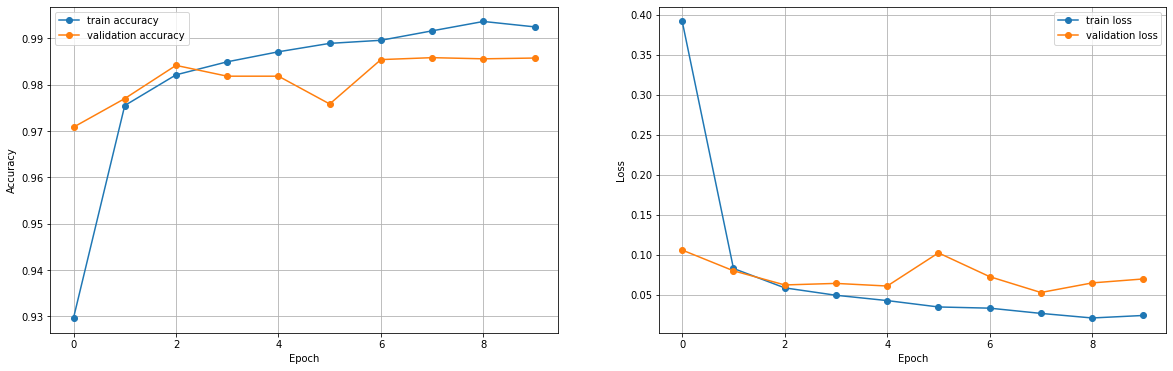

In [285]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', 
         label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-',
         label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', 
         label='train loss')
plt.plot(h.history['val_loss'], 'o-',
         label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [286]:
test_loss, test_acc = model_adam.evaluate(test_imgs, test_labels)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)



313/313 [==============================] - 3s 10ms/step - loss: 0.0769 - accuracy: 0.9855

Test Accuracy: 0.9854999780654907

Test Loss: 0.07686080038547516


In [287]:
#COMPILE SGD MODEL
model_sgd.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)

In [288]:


h = model.fit(x=train_imgs, y=train_labels, epochs=10, validation_split=0.2,batch_size=32)



Epoch 1/10
1500/1500 [==============================] - 55s 36ms/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 0.0702 - val_accuracy: 0.9872
Epoch 2/10
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0065 - accuracy: 0.9978 - val_loss: 0.0712 - val_accuracy: 0.9870
Epoch 3/10
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.0833 - val_accuracy: 0.9888
Epoch 4/10
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0931 - val_accuracy: 0.9881
Epoch 5/10
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0834 - val_accuracy: 0.9884
Epoch 6/10
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0856 - val_accuracy: 0.9884
Epoch 7/10
1500/1500 [==============================] - 54s 36ms/step - loss: 4.6548e-04 - accuracy: 0.9999 - val_loss: 0.09

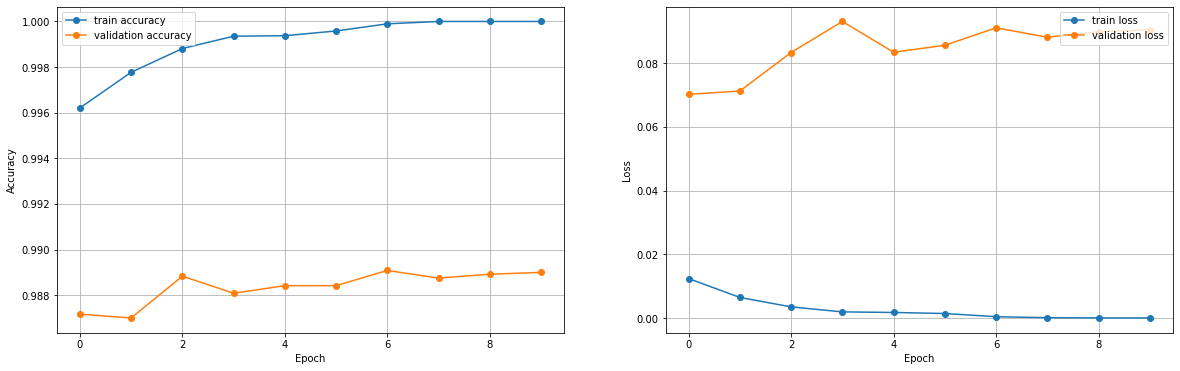

In [289]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', 
         label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-',
         label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', 
         label='train loss')
plt.plot(h.history['val_loss'], 'o-',
         label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [290]:
test_loss, test_acc = model_sgd.evaluate(test_imgs, test_labels)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)


313/313 [==============================] - 3s 10ms/step - loss: 0.0820 - accuracy: 0.9909

Test Accuracy: 0.9908999800682068

Test Loss: 0.08199132978916168


In [291]:
#COMPILE RMS MODEL
model_rmsprop.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)

In [292]:
h = model.fit(x=train_imgs, y=train_labels, epochs=10, validation_split=0.2,batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 56s 37ms/step - loss: 0.0075 - accuracy: 0.9981 - val_loss: 0.1239 - val_accuracy: 0.9878
Epoch 2/10
1500/1500 [==============================] - 55s 37ms/step - loss: 0.0089 - accuracy: 0.9977 - val_loss: 0.1789 - val_accuracy: 0.9872
Epoch 3/10
1500/1500 [==============================] - 55s 37ms/step - loss: 0.0104 - accuracy: 0.9981 - val_loss: 0.1483 - val_accuracy: 0.9862
Epoch 4/10
1500/1500 [==============================] - 56s 37ms/step - loss: 0.0077 - accuracy: 0.9985 - val_loss: 0.1654 - val_accuracy: 0.9873
Epoch 5/10
1500/1500 [==============================] - 55s 37ms/step - loss: 0.0087 - accuracy: 0.9983 - val_loss: 0.1560 - val_accuracy: 0.9886
Epoch 6/10
1500/1500 [==============================] - 56s 37ms/step - loss: 0.0055 - accuracy: 0.9989 - val_loss: 0.1735 - val_accuracy: 0.9894
Epoch 7/10
1500/1500 [==============================] - 56s 37ms/step - loss: 0.0100 - accuracy: 0.9984 - val_loss: 0.2206 -

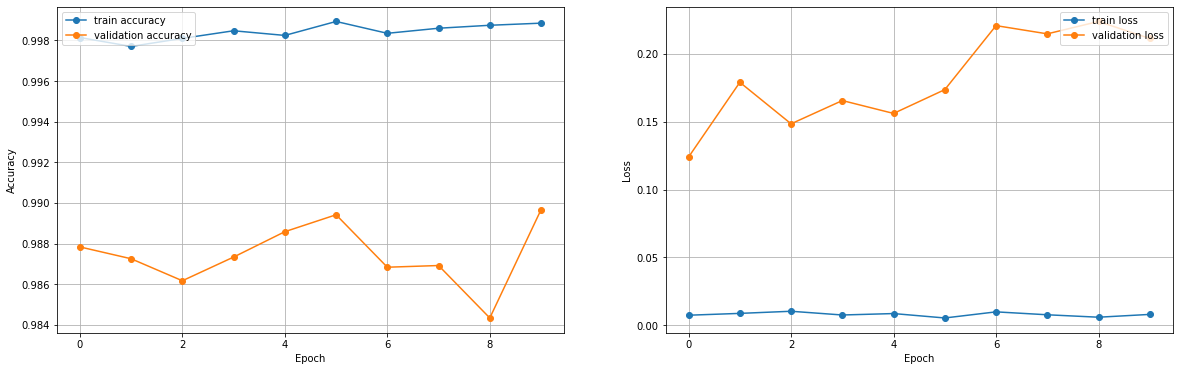

In [293]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', 
         label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-',
         label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', 
         label='train loss')
plt.plot(h.history['val_loss'], 'o-',
         label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [294]:
test_loss, test_acc = model_rmsprop.evaluate(test_imgs, test_labels)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

313/313 [==============================] - 3s 11ms/step - loss: 0.2149 - accuracy: 0.9888

Test Accuracy: 0.9887999892234802

Test Loss: 0.21490654349327087
